In [1]:
from FIFA_Converter import converter as cv
import math as mt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [28]:
file = cv.pd.read_csv("Data/fifa21_validate.csv")

In [29]:
num, cat = cv.fifa_data_cleaned(file,concat=False)

C:\Users\micle\Ironhack_DAFTFEB2022\Week 2\Day 1\FIFA_Converter\converter.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_numerical["Composure"] = df_new_numerical["Composure"].fillna(mean_composure)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\micle\Ironhack_DAFTFEB2022\Week 2\Day 1\FIFA_Converter\converter.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

In [30]:
cat = cat.drop(columns=["Name", "Nationality", "Club", "Position", "Team & Contract", "Joined", "Contract" ])

In [31]:
categorical_ordinal_values = cat[['Attacking Workrate','Defensing Workrate']]


#1. Attacking Work Rate
mapping = {'Low':0,'Medium':1, 'High':2}
categorical_ordinal_values = categorical_ordinal_values.replace({'Attacking Workrate': mapping})

#Defensive Work Rate
mapping2 = {'Low':0,'Medium':1, 'High':2}
categorical_ordinal_values = categorical_ordinal_values.replace({'Defensing Workrate': mapping2})

In [32]:
num = num.drop(columns=["ID"])

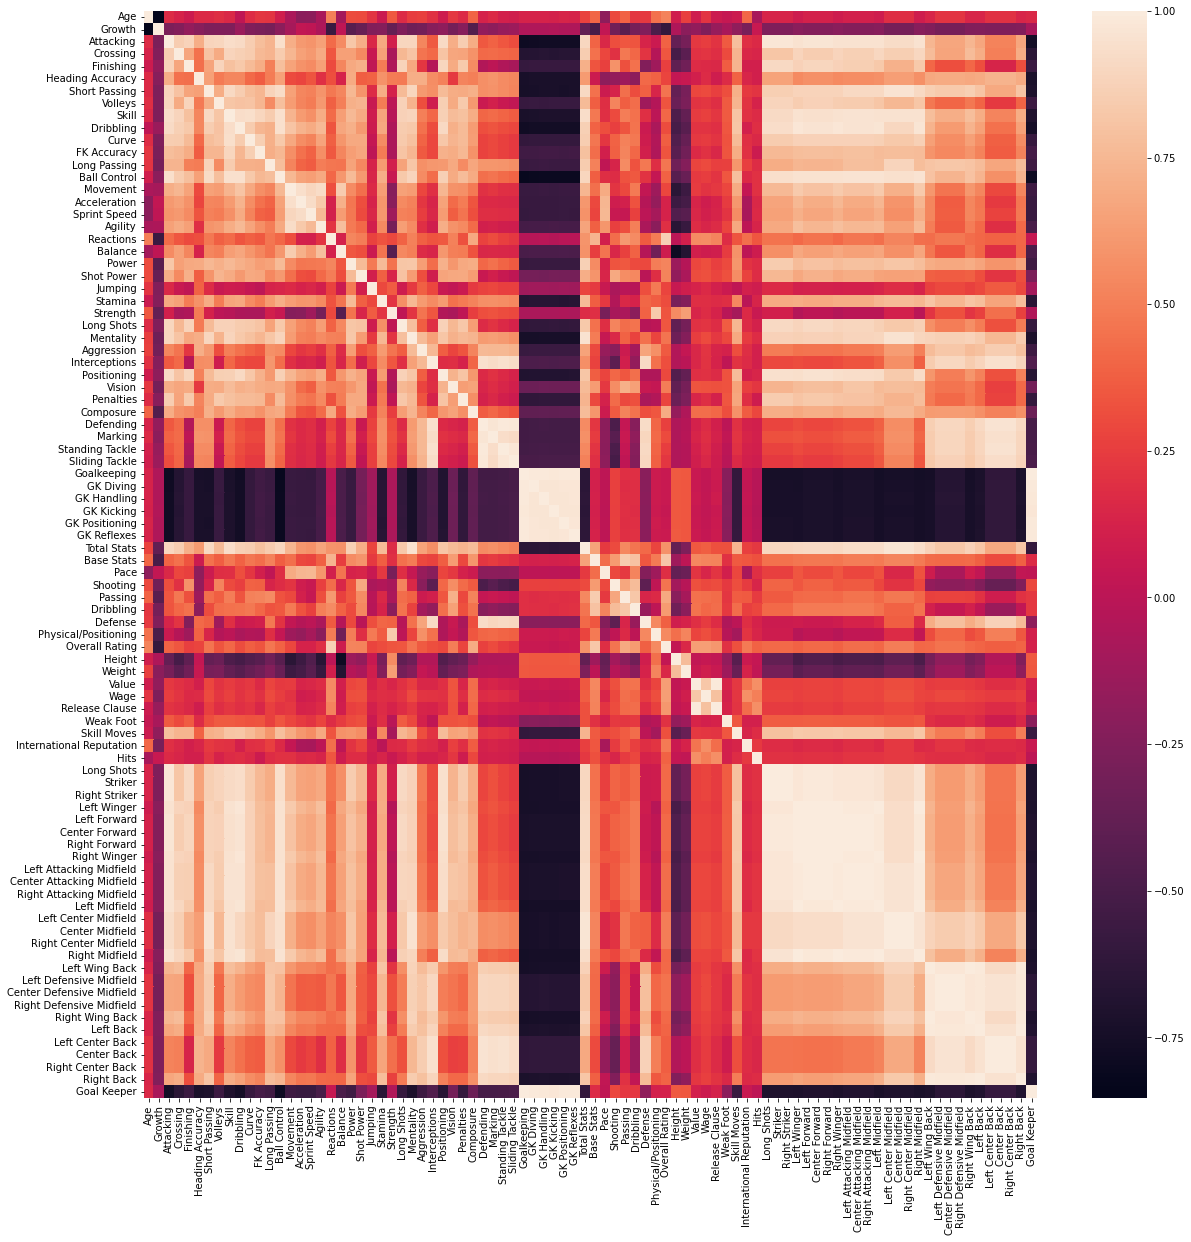

In [33]:
cv.plt.figure(figsize=(20, 20))
cv.sns.heatmap(num.corr(),);
cv.plt.show()

In [34]:
num.corr()

,Age,Growth,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,...,Left Defensive Midfield,Center Defensive Midfield,Right Defensive Midfield,Right Wing Back,Left Back,Left Center Back,Center Back,Right Center Back,Right Back,Goal Keeper
Age,1.000000,-0.853651,0.168316,0.128710,0.078827,0.167201,0.163707,0.183334,0.156276,0.018043,...,0.211467,0.211467,0.211467,0.142253,0.143147,0.196576,0.196576,0.196576,0.143147,0.155172
Growth,-0.853651,1.000000,-0.270397,-0.239023,-0.172087,-0.222272,-0.261832,-0.258271,-0.255344,-0.137657,...,-0.290940,-0.290940,-0.290940,-0.250020,-0.240114,-0.256045,-0.256045,-0.256045,-0.240114,-0.080262
Attacking,0.168316,-0.270397,1.000000,0.854579,0.879602,0.703501,0.887113,0.898426,0.929181,0.918199,...,0.668492,0.668492,0.668492,0.740349,0.671836,0.519625,0.519625,0.519625,0.671836,-0.752292
Crossing,0.128710,-0.239023,0.854579,1.000000,0.673654,0.448711,0.803404,0.692682,0.888117,0.863408,...,0.664309,0.664309,0.664309,0.773798,0.702378,0.503951,0.503951,0.503951,0.702378,-0.649199
Finishing,0.078827,-0.172087,0.879602,0.673654,1.000000,0.438085,0.662549,0.889646,0.791740,0.827037,...,0.313544,0.313544,0.313544,0.409868,0.317001,0.132828,0.132828,0.132828,0.317001,-0.568567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Left Center Back,0.196576,-0.256045,0.519625,0.503951,0.132828,0.728009,0.684791,0.233620,0.525456,0.446821,...,0.961421,0.961421,0.961421,0.914171,0.953657,1.000000,1.000000,1.000000,0.953657,-0.591412
Center Back,0.196576,-0.256045,0.519625,0.503951,0.132828,0.728009,0.684791,0.233620,0.525456,0.446821,...,0.961421,0.961421,0.961421,0.914171,0.953657,1.000000,1.000000,1.000000,0.953657,-0.591412
Right Center Back,0.196576,-0.256045,0.519625,0.503951,0.132828,0.728009,0.684791,0.233620,0.525456,0.446821,...,0.961421,0.961421,0.961421,0.914171,0.953657,1.000000,1.000000,1.000000,0.953657,-0.591412
Right Back,0.143147,-0.240114,0.671836,0.702378,0.317001,0.693262,0.809205,0.392176,0.701549,0.645224,...,0.982963,0.982963,0.982963,0.991530,1.000000,0.953657,0.953657,0.953657,1.000000,-0.689340


In [35]:
num = cv.pd.concat([num, categorical_ordinal_values], axis=1)

In [36]:
#display(num)

In [37]:
X_final = num.drop(columns=["Overall Rating"])
y_final = num[["Overall Rating"]]

In [12]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_final, y_final, test_size = 0.2, random_state = 100)

In [13]:
MinMaxtransformer = MinMaxScaler()
MinMaxtransformer.fit(X_train_f)
X_train_normalized_min_max = MinMaxtransformer.transform(X_train_f)
X_train_normalized_min_max = pd.DataFrame(X_train_normalized_min_max,columns=X_final.columns)

In [14]:
MinMaxtransformer = MinMaxScaler()
MinMaxtransformer.fit(X_test_f)
X_test_normalized_min_max = MinMaxtransformer.transform(X_test_f)
X_test_normalized_min_max = pd.DataFrame(X_test_normalized_min_max,columns=X_final.columns)

In [15]:
Standardtransformer = StandardScaler()
Standardtransformer.fit(X_train_f)
x_standardized_train = Standardtransformer.transform(X_train_f)
x_standardized_train = pd.DataFrame(x_standardized_train,columns=X_final.columns)

In [16]:
Standardtransformer = StandardScaler()
Standardtransformer.fit(X_test_f)
x_standardized_test = Standardtransformer.transform(X_test_f)
x_standardized_test = pd.DataFrame(x_standardized_test,columns=X_final.columns)

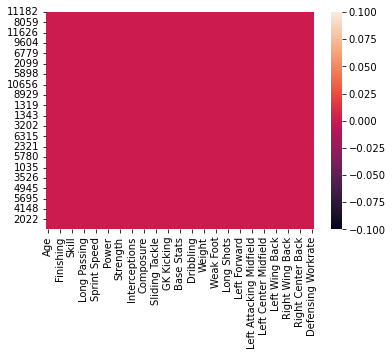

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.heatmap(X_train_f.isna())

In [18]:
for col in X_train_f.columns:
    print("In column {} thre are {} na".format(col,X_train_f[col].isna().sum()))

In column Age thre are 0 na
In column Growth thre are 0 na
In column Attacking thre are 0 na
In column Crossing thre are 0 na
In column Finishing thre are 0 na
In column Heading Accuracy thre are 0 na
In column Short Passing thre are 0 na
In column Volleys thre are 0 na
In column Skill thre are 0 na
In column Dribbling thre are Dribbling    0
Dribbling    0
dtype: int64 na
In column Curve thre are 0 na
In column FK Accuracy thre are 0 na
In column Long Passing thre are 0 na
In column Ball Control thre are 0 na
In column Movement thre are 0 na
In column Acceleration thre are 0 na
In column Sprint Speed thre are 0 na
In column Agility thre are 0 na
In column Reactions thre are 0 na
In column Balance thre are 0 na
In column Power thre are 0 na
In column Shot Power thre are 0 na
In column Jumping thre are 0 na
In column Stamina thre are 0 na
In column Strength thre are 0 na
In column Long Shots thre are Long Shots    0
Long Shots    0
dtype: int64 na
In column Mentality thre are 0 na
In co

In [19]:
lr_base = LinearRegression()
lr_base.fit(X_train_f, y_train_f)

LinearRegression()

In [38]:
y_predict = lr_base.predict(X_final)

## Base

In [39]:
print("R2:", r2_score(y_predict, y_final))
print("MSE:", mean_squared_error(y_predict, y_final))
print("RMSE:", cv.np.sqrt(mean_squared_error(y_predict, y_final)))
print("MAE:",mean_absolute_error(y_predict, y_final))

R2: 0.9010470365236485
MSE: 4.136554827145503
RMSE: 2.03385221369339
MAE: 1.584026784566209


In [22]:
lr_min_max = LinearRegression()
lr_min_max.fit(X_train_normalized_min_max, y_train_f)

LinearRegression()

In [42]:
y_predict_min_max = lr_min_max.predict(X_final)

## Normalized

In [43]:
print("R2:",r2_score(y_predict_min_max , y_final))
print("MSE:",mean_squared_error(y_predict_min_max , y_final))
print("RMSE:",cv.np.sqrt(mean_squared_error(y_predict_min_max , y_final)))
print("MAE:",mean_absolute_error(y_predict_min_max , y_final))

R2: -2.5788153989792035
MSE: 2.489459232402734e+29
RMSE: 498944809813944.7
MAE: 483769737810112.6


In [25]:
lr_stand = LinearRegression()
lr_stand.fit(x_standardized_train, y_train_f)

LinearRegression()

In [26]:
y_predict_stand = lr_stand.predict(x_standardized_test)

## Standardized

In [27]:
print("R2:",r2_score(y_predict_stand , y_test_f))
print("MSE:",mean_squared_error(y_predict_stand , y_test_f))
print("RMSE:",cv.np.sqrt(mean_squared_error(y_predict_stand , y_test_f)))
print("MAE:",mean_absolute_error(y_predict_stand , y_test_f))

R2: -7.73950237231702e-10
MSE: 1.7758618121963377e+19
RMSE: 4214097545.3782954
MAE: 3434299911.4538283
